In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import time
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np

In [2]:
spam_data = pd.read_csv('spam_tfidf.csv', index_col=[0])
spam_data.head()

,1,2,3,4,5,6,7,8,9,10,...,46,47,48,49,50,51,52,53,54,targhet
0,0.000000,1.04567,0.570084,0.0,0.309696,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.553776,0.000000,0.00000,1
1,0.309672,0.45748,0.445378,0.0,0.135492,0.427637,0.365548,0.120390,0.000000,1.186630,...,0.000000,0.0,0.0,0.00000,0.069628,0.0,0.264787,0.214164,0.08707,1
2,0.088478,0.00000,0.632436,0.0,1.190396,0.290182,0.330734,0.206383,1.141600,0.315593,...,0.131159,0.0,0.0,0.01762,0.075430,0.0,0.196455,0.218923,0.01814,1
3,0.000000,0.00000,0.000000,0.0,0.609715,0.000000,0.539619,1.083511,0.552962,0.795294,...,0.000000,0.0,0.0,0.00000,0.072265,0.0,0.097516,0.000000,0.00000,1
4,0.000000,0.00000,0.000000,0.0,0.609715,0.000000,0.539619,1.083511,0.552962,0.795294,...,0.000000,0.0,0.0,0.00000,0.071210,0.0,0.096092,0.000000,0.00000,1


In [3]:
# data processing
X = spam_data.drop('targhet', axis=1)
y = spam_data['targhet']  # colonna che segna se è o meno spam

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Training time with C = 0: 0.900204
Prediction time: 0.070628
Miss-classified examples: 75
Accuracy: 0.919
acccuratezza media con C=1.0: 0.8980625973658123
Training time with C = 1: 2.453013
Prediction time: 0.049562
Miss-classified examples: 75
Accuracy: 0.919
acccuratezza media con C=10.0: 0.8980630694424775
Training time with C = 2: 33.587005
Prediction time: 0.046047
Miss-classified examples: 76
Accuracy: 0.917
acccuratezza media con C=100.0: 0.8978456781381295


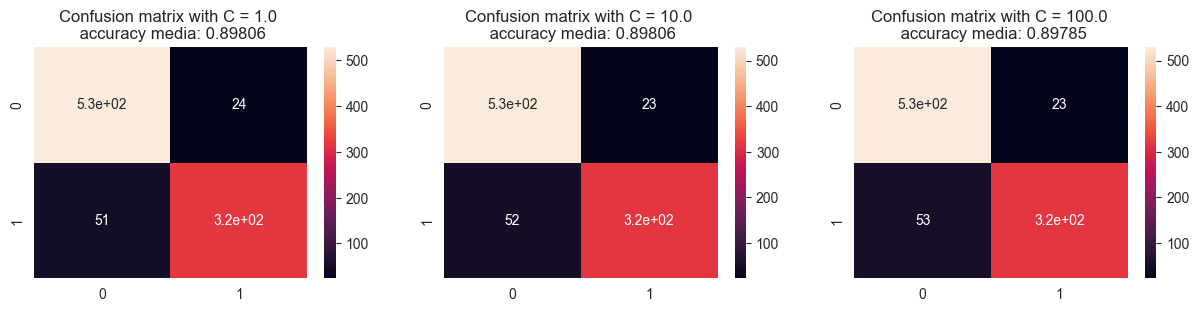

In [6]:
# qui faccio il learning
%matplotlib inline
# voglio fare cross validation usando vari valori di C
c: list = [1.0, 10.0, 100.0]
fig, axs = plt.subplots(1, len(c), figsize=(15, 3))

for i in range(len(c)):
    svcclassifier = SVC(kernel='linear', C=c[i])
    start_time = time.time()
    svcclassifier.fit(X_train, y_train)
    print(f'Training time with C = {i}: %f' % (time.time() - start_time))
    start_time = time.time()
    y_predict = svcclassifier.predict(X_test)
    print('Prediction time: %f' % (time.time() - start_time))
    print('Miss-classified examples: %d' % (y_test != y_predict).sum())
    print('Accuracy: %.3f' % accuracy_score(y_test, y_predict))
    score = cross_val_score(svcclassifier, X, y, cv=5)
    print(f'acccuratezza media con C={c[i]}: {np.mean(score)}')
    cm = confusion_matrix(y_test, y_predict)
    sn.heatmap(cm, annot=True, ax=axs[i])
    axs[i].set_title(f'Confusion matrix with C = {c[i]} \n accuracy media: %.5f' %np.mean(score))
plt.show()

In [7]:
fig.savefig('confusion matrix per svm lineare.png', bbox_inches='tight')